# TechAcademy: Honey and Bees Python Solution

 # Exlporatory Data Analysis (EDA)

## Import Packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import plotly.express as px
import seaborn as sns
import folium

## Plot Styles

In [3]:
plt.style.use('./styles/ta.mplstyle')  # TA-Style
myFmt = mdates.DateFormatter('%Y-%m')

## Load the data

In [4]:
# Bees
bees = pd.read_csv('https://drive.google.com/uc?export=download&id=1lop3qnrSve5A13jNcL6wCehGpDaCrGRO', index_col=0)
# Honey
honey = pd.read_csv('https://drive.google.com/uc?export=download&id=1bQtWQluwwGUIgZuDOsJOE-4Om7x4HOxP', index_col=0)
# Weather
weather = pd.read_csv('https://drive.google.com/uc?export=download&id=130q2nv8-4S769iEEAsunGmiF16tahNmT', index_col=0)

## Rename the weather index nicely

In [5]:
# enjoy this link to rename the weather index https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
weather.rename(index=abbrev_to_us_state, inplace=True)

## Get a feeling for the data

In [6]:
print(bees.head())
print(honey.head())
print(weather.head())
print(bees["Starting Colonies"].describe())

print(bees.dtypes)
print(honey.dtypes)
print(weather.dtypes)

            Date Starting Colonies Maximum Colonies Lost Colonies  \
State                                                               
Alabama  2015-Q3              8500             9000          1400   
Alabama  2015-Q4              8000             8000           610   
Alabama  2016-Q1              7500             7500          1700   
Alabama  2015-Q2              7500             7500           860   
Alabama  2015-Q1              7000             7000          1800   

        Added Colonies Renovated Colonies Percent Renovated  \
State                                                         
Alabama            160                260                 3   
Alabama             80                 60                 1   
Alabama           2100                 90                 1   
Alabama           1900                680                 9   
Alabama           2800                250                 4   

        Varroa Mites (Percent) Other pests and parasites (Percent)  \
Stat

## Task 0: Some overall Statements

In [7]:
# Exclude index values regarding the U.S. as a whole
# State and year with most producing colonies ever
tmp = honey.copy()
tmp = tmp.drop(['United States'])
tmp1 = tmp.loc[tmp["Honey producing colonies (thousand)"] == tmp["Honey producing colonies (thousand)"].max()]
print(tmp1[["Honey producing colonies (thousand)", "Year"]])

              Honey producing colonies (thousand)  Year
State                                                  
North Dakota                                  530  2018


In [8]:
# State with lowest honey price every
tmp2 = tmp.loc[tmp["Average price per pound (dollars)"] == tmp["Average price per pound (dollars)"].min()]
print(tmp2[["Average price per pound (dollars)", "Year"]])

        Average price per pound (dollars)  Year
State                                          
Hawaii                               1.28  2019


In [9]:
# Total United States Honey production
# Year is a float
tmp3 = honey.loc[(honey["Production (1,000 pounds)"] == honey["Production (1,000 pounds)"].max()) & (honey.Year == 2016)]
print(tmp3[["Production (1,000 pounds)"]])

               Production (1,000 pounds)
State                                   
United States                     161882


In [10]:
# Total United States Honey producing colonies
tmp4 = tmp.loc[tmp.Year == 2016]
print(tmp4[["Honey producing colonies (thousand)"]].sum())

Honey producing colonies (thousand)    2775
dtype: int64


## Task 1: Convert from pounds to kg and prices to $/kg

In [11]:
honey["honey_producing_colonies"] = honey["Honey producing colonies (thousand)"] # * 1000
honey["yield_colony_kg"] = honey["Yield per colony (pounds)"] * 0.453592
honey["production_kg"] = honey["Production (1,000 pounds)"] * 0.453592  # * 1000
honey["stock_price_kg"] = honey["Stocks December 15  (1,000 pounds) "] /1000 * 0.453592 * 100
honey["avg_price_kg"] = honey["Average price per pound (dollars)"] * 0.453592
honey["prod_value"] = honey["Value of production (1,000 dollars)"]  # * 1000

honey.drop(
    ["Honey producing colonies (thousand)", "Yield per colony (pounds)", "Production (1,000 pounds)",
     "Stocks December 15  (1,000 pounds) ", "Average price per pound (dollars)", "Value of production (1,000 dollars)"],
    axis=1,
    inplace=True,
)

## Task 2: write loop to round up to the decimal place you prefer (does not make sense for Python really)

In [12]:
honey = honey.round(2)

## Task 3: Years in date format

In [13]:
honey.Year = pd.to_datetime(honey.Year, format="%Y")  # assumes start of year 01.01 by convention
bees.Date = pd.to_datetime(bees.Date)
weather.datetime = pd.to_datetime(weather.datetime)

## Task 4: numbers into numeric format, numeric should be a loop

In [14]:
cols = bees.columns.drop(['Date', 'Latitude', 'Longitude', 'State_code'])
bees[cols] = bees[cols].apply(pd.to_numeric, errors='coerce')

# as a tideous loop
# for col in cols:
#    bees[col] = pd.to_numeric(bees[col], errors='coerce')


In [15]:
bees.dtypes

Date                                   datetime64[ns]
Starting Colonies                             float64
Maximum Colonies                              float64
Lost Colonies                                 float64
Added Colonies                                float64
Renovated Colonies                            float64
Percent Renovated                             float64
Varroa Mites (Percent)                        float64
Other pests and parasites (Percent)           float64
Diseases (percent)                            float64
Pesticides (percent)                          float64
Other (percent)                               float64
Unknown (percent)                             float64
State_code                                     object
Latitude                                      float64
Longitude                                     float64
dtype: object

## Task 5: Calculate the percentage of lost colonies & round, why id you decide to round the way you have to?

In [16]:
bees["lost_colonies_percent"] = bees["Lost Colonies"] / bees["Starting Colonies"] * 100
bees.lost_colonies_percent

State
Alabama    16.470588
Alabama     7.625000
Alabama    22.666667
Alabama    11.466667
Alabama    25.714286
             ...    
Wyoming     3.500000
Wyoming    11.428571
Wyoming    10.909091
Wyoming     6.956522
Wyoming    13.076923
Name: lost_colonies_percent, Length: 1125, dtype: float64

## Task 6: Bees Missing Values

In [17]:
# Let's check out all missing values
null_data = bees[bees.isnull().any(axis=1)]
print(null_data)
# 2019-04-01 seems to have cross-state issues on bee data

# Deciding to do a simple combination of ffill and bfill
no_null_data = null_data.ffill().bfill()
print(no_null_data)

              Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
Alabama 2016-10-01             7000.0            7000.0          610.0   
Alabama 2016-07-01             8000.0            8000.0         1200.0   
...            ...                ...               ...            ...   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   
Wyoming 2021-01-01            13000.0           14500.0         1700.0   

         Added Colonies  Renovated Co

In [18]:
# actually apply that
bees = bees.ffill().bfill()

## Task 7: Group means over quarters for each year

In [19]:
# Sorry for the chain commands :P
bees_grped = bees.groupby([bees.index, bees.Date.dt.year]).mean().reset_index(level=1).sort_values(["State","Date"])
# group_by with reset_index does not preserve dtypes
bees_grped.Date = pd.to_datetime(bees_grped.Date, format="%Y")

## Task 8: Prepare for merging bees with honey

In [20]:
bees_grped.rename(
    columns={
    "Starting Colonies": "starting_cols",
    "Maximum Colonies": "max_cols",
    "Lost Colonies": "lost_cols",
    "Added Colonies": "added_cols",
    "Diseases (percent)": "diseases_perc",
    "Other pests and parasites (Percent)": "other_pest_parasites_perc",
    "Other (percent)": "other_perc",
    "Unknown (percent)": "unknown_perc",
    "Percent Renovated": "perc_renovated",
    "Renovated Colonies": "renovated_cols",
    "Pesticides (percent)": "pesticides_perc",
    "Varroa Mites (Percent)": "varroa_mites_perc",
},
    inplace=True,
)
bees_grped

Date  starting_cols  max_cols  lost_cols  added_cols  \
State                                                                
Alabama 2015-01-01         7750.0    7875.0     1167.5      1235.0   
Alabama 2016-01-01         7625.0    7625.0     1110.0       947.5   
Alabama 2017-01-01         7000.0    7625.0      982.5       752.5   
Alabama 2018-01-01         7375.0    7750.0     1000.0      1177.5   
Alabama 2019-01-01         6375.0    6750.0      737.5       725.0   
...            ...            ...       ...        ...         ...   
Wyoming 2017-01-01        21125.0   28000.0     3475.0      3225.0   
Wyoming 2018-01-01        19250.0   25750.0     2280.0      1897.5   
Wyoming 2019-01-01        16000.0   18500.0     1700.0       650.0   
Wyoming 2020-01-01        19375.0   26500.0     1835.0      1412.5   
Wyoming 2021-01-01        13000.0   14500.0     1700.0       500.0   

         renovated_cols  perc_renovated  varroa_mites_perc  \
State                                                        
Alabama           312.5            4.25             23.225   
Alabama           210.0            7.75             14.450   
Alabama           567.5            8.00             32.400   
Alabama          1202.5           15.75             38.125   
Alabama           327.5            4.50             32.425   
...                 ...             ...                ...   
Wyoming          1830.0            5.75             23.525   
Wyoming          1525.0            4.75             22.425   
Wyoming           997.5            3.75             18.675   
Wyoming          2510.0            8.25             22.250   
Wyoming          1200.0            8.00             19.200   

         other_pest_parasites_perc  diseases_perc  pesticides_perc  \
State                                                                
Alabama                     31.225          2.250            1.825   
Alabama                     20.525          1.275            4.000   
Alabama                     13.900          2.250           13.075   
Alabama                     36.850          1.300           11.350   
Alabama                     25.325          1.650            4.950   
...                            ...            ...              ...   
Wyoming                      1.875          7.625            3.275   
Wyoming                      2.775          1.750            4.475   
Wyoming                      3.175          1.675            0.550   
Wyoming                      9.225          0.400            2.350   
Wyoming                      0.000          0.700            0.000   

         other_perc  unknown_perc   Latitude   Longitude  \
State                                                      
Alabama       4.325         8.275  32.601011  -86.680736   
Alabama       4.275         8.450  32.601011  -86.680736   
Alabama       6.325         5.925  32.601011  -86.680736   
Alabama       7.300         5.225  32.601011  -86.680736   
Alabama       7.800         7.200  32.601011  -86.680736   
...             ...           ...        ...         ...   
Wyoming       5.000         1.925  43.000325 -107.554567   
Wyoming       2.225         2.500  43.000325 -107.554567   
Wyoming       2.900         5.075  43.000325 -107.554567   
Wyoming       2.075         1.300  43.000325 -107.554567   
Wyoming       3.300         7.900  43.000325 -107.554567   

         lost_colonies_percent  
State                           
Alabama              15.319135  
Alabama              14.501488  
Alabama              13.920879  
Alabama              13.247070  
Alabama              11.561688  
...                        ...  
Wyoming              23.066392  
Wyoming              12.969251  
Wyoming               8.103632  
Wyoming               8.198546  
Wyoming              13.076923  

[315 rows x 16 columns]

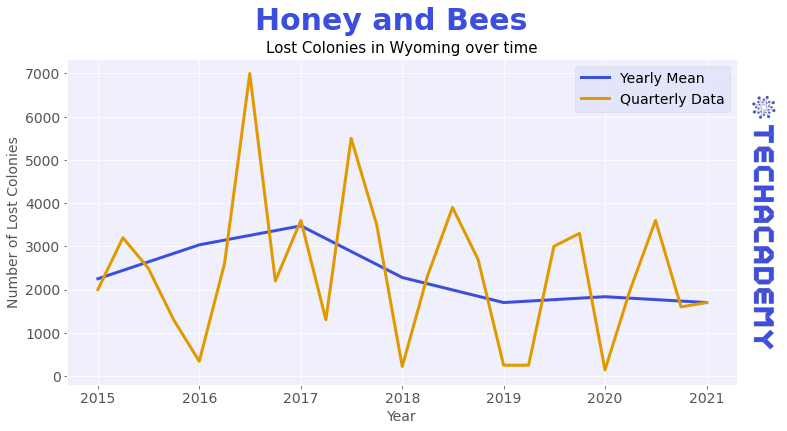

In [21]:
state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Lost Colonies in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Lost Colonies')

# plot data
df1 = bees_grped[state:state]
df2 = bees[state:state]
ax.plot(df1.Date, df1.lost_cols, label="Yearly Mean")
ax.plot(df2.Date, df2["Lost Colonies"], label="Quarterly Data")

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

ax.legend(loc="upper right", fontsize=14)
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

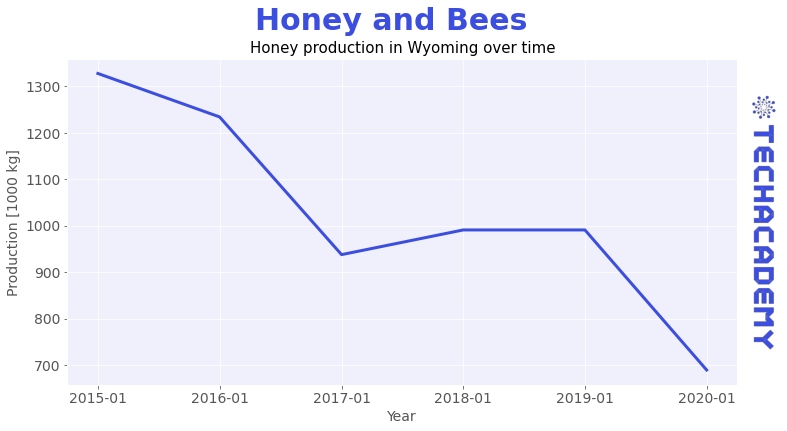

In [22]:
# average production by state
avg_state_prod = honey.groupby(honey.index)["production_kg"].mean()
# production by state and year
state_year_prod = honey.groupby([honey.index, honey.Year])["production_kg"].sum()

state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Honey production in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Production [1000 kg]')

# plot data
df = state_year_prod[state:state]
ax.plot(df.index.get_level_values('Year'), df.values)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
# date formatting
ax.xaxis.set_major_formatter(myFmt)
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

## Task 9: Merge

In [23]:
bees_grped

Date  starting_cols  max_cols  lost_cols  added_cols  \
State                                                                
Alabama 2015-01-01         7750.0    7875.0     1167.5      1235.0   
Alabama 2016-01-01         7625.0    7625.0     1110.0       947.5   
Alabama 2017-01-01         7000.0    7625.0      982.5       752.5   
Alabama 2018-01-01         7375.0    7750.0     1000.0      1177.5   
Alabama 2019-01-01         6375.0    6750.0      737.5       725.0   
...            ...            ...       ...        ...         ...   
Wyoming 2017-01-01        21125.0   28000.0     3475.0      3225.0   
Wyoming 2018-01-01        19250.0   25750.0     2280.0      1897.5   
Wyoming 2019-01-01        16000.0   18500.0     1700.0       650.0   
Wyoming 2020-01-01        19375.0   26500.0     1835.0      1412.5   
Wyoming 2021-01-01        13000.0   14500.0     1700.0       500.0   

         renovated_cols  perc_renovated  varroa_mites_perc  \
State                                                        
Alabama           312.5            4.25             23.225   
Alabama           210.0            7.75             14.450   
Alabama           567.5            8.00             32.400   
Alabama          1202.5           15.75             38.125   
Alabama           327.5            4.50             32.425   
...                 ...             ...                ...   
Wyoming          1830.0            5.75             23.525   
Wyoming          1525.0            4.75             22.425   
Wyoming           997.5            3.75             18.675   
Wyoming          2510.0            8.25             22.250   
Wyoming          1200.0            8.00             19.200   

         other_pest_parasites_perc  diseases_perc  pesticides_perc  \
State                                                                
Alabama                     31.225          2.250            1.825   
Alabama                     20.525          1.275            4.000   
Alabama                     13.900          2.250           13.075   
Alabama                     36.850          1.300           11.350   
Alabama                     25.325          1.650            4.950   
...                            ...            ...              ...   
Wyoming                      1.875          7.625            3.275   
Wyoming                      2.775          1.750            4.475   
Wyoming                      3.175          1.675            0.550   
Wyoming                      9.225          0.400            2.350   
Wyoming                      0.000          0.700            0.000   

         other_perc  unknown_perc   Latitude   Longitude  \
State                                                      
Alabama       4.325         8.275  32.601011  -86.680736   
Alabama       4.275         8.450  32.601011  -86.680736   
Alabama       6.325         5.925  32.601011  -86.680736   
Alabama       7.300         5.225  32.601011  -86.680736   
Alabama       7.800         7.200  32.601011  -86.680736   
...             ...           ...        ...         ...   
Wyoming       5.000         1.925  43.000325 -107.554567   
Wyoming       2.225         2.500  43.000325 -107.554567   
Wyoming       2.900         5.075  43.000325 -107.554567   
Wyoming       2.075         1.300  43.000325 -107.554567   
Wyoming       3.300         7.900  43.000325 -107.554567   

         lost_colonies_percent  
State                           
Alabama              15.319135  
Alabama              14.501488  
Alabama              13.920879  
Alabama              13.247070  
Alabama              11.561688  
...                        ...  
Wyoming              23.066392  
Wyoming              12.969251  
Wyoming               8.103632  
Wyoming               8.198546  
Wyoming              13.076923  

[315 rows x 16 columns]

In [24]:
honey

Year  honey_producing_colonies  yield_colony_kg  \
State                                                                 
Alabama       2015-01-01                         7            21.32   
Arizona       2015-01-01                        26            22.23   
Arkansas      2015-01-01                        24            32.66   
California    2015-01-01                       275            13.61   
Colorado      2015-01-01                        29            23.13   
...                  ...                       ...              ...   
West Virginia 2020-01-01                         6            20.87   
Wisconsin     2020-01-01                        45            22.68   
Wyoming       2020-01-01                        38            18.14   
Other         2020-01-01                        33            19.05   
United States 2020-01-01                      2706            24.72   

               production_kg  stock_price_kg  avg_price_kg  prod_value  
State                                                                   
Alabama               149.23            0.59          1.74        1260  
Arizona               577.88           13.88          0.98        2765  
Arkansas              783.81            5.49          0.92        3491  
California           3742.13           67.36          0.93       16830  
Colorado              670.86           18.10          0.99        3224  
...                      ...             ...           ...         ...  
West Virginia         125.19            2.63          1.76        1074  
Wisconsin            1020.58           38.78          1.48        7335  
Wyoming               689.46           27.58          0.75        2523  
Other                 623.69           13.74          1.98        5995  
United States       66947.46         1801.44          0.92      299616  

[252 rows x 7 columns]

In [25]:
bees_and_honey = bees_grped.merge(honey, left_on=["State", "Date"], right_on=["State", "Year"]).sort_values(by=["State", "Date"])
bees_and_honey

# Observe that we have lost quite a few observations with this inner merge as the bees data set is more comprehensive than the honey set
set(bees.index.unique()).difference(set(bees_and_honey.index.unique()))

{'Connecticut', 'Maryland', 'Massachusetts', 'New Mexico', 'Oklahoma'}

In [26]:
print(len(bees.index.unique()))
print(len(honey.index.unique()))
print(len(bees_and_honey.index.unique()))

45
42
40


## Task 10: Bar Plot Starting Colonies Sorted by lowest to highest, + line for mean

In [27]:
# Only most recent, January 2020, observations
bee_pop_20 = pd.DataFrame(bees_and_honey.loc[bees_and_honey.Date >= '2020'])
# change string objects to numerics (done earlier)
# bee_pop_20["starting_cols"] = pd.to_numeric(bee_pop_20["starting_cols"])
# sort ascending (this wont work as intended if the value are string objects)
bee_pop_20 = bee_pop_20.sort_values(by="starting_cols")

In [28]:
bee_pop_20.starting_cols

State
Maine               5350.0
Kansas              6250.0
West Virginia       7250.0
Vermont             7250.0
Missouri            7375.0
Virginia            7500.0
Alabama            10000.0
Kentucky           10250.0
Indiana            11750.0
New Jersey         12250.0
Tennessee          12500.0
Illinois           12625.0
South Carolina     13750.0
Colorado           17250.0
Hawaii             18000.0
Ohio               18500.0
Arkansas           18625.0
Wyoming            19375.0
North Carolina     20375.0
Utah               21500.0
Pennsylvania       23125.0
Iowa               25500.0
Arizona            27000.0
Nebraska           28875.0
Mississippi        29000.0
Wisconsin          42750.0
New York           44000.0
Louisiana          47750.0
Montana            71250.0
Minnesota          73250.0
Washington         73750.0
Michigan           79250.0
Idaho              92000.0
Oregon            102500.0
South Dakota      114125.0
Georgia           143750.0
Texas             2265

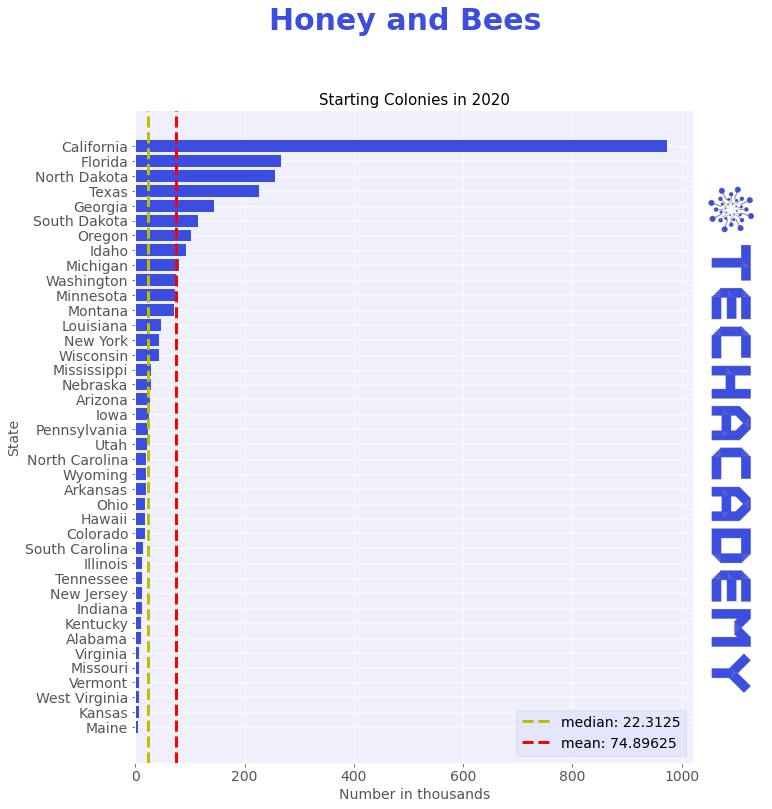

In [29]:
suptitle = "Honey and Bees"
title = f"Starting Colonies in 2020"
fig, ax = plt.subplots(figsize=(10,12))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.ylabel('State')
plt.xlabel('Number in thousands')

# plot data
ax.barh(bee_pop_20.index,bee_pop_20.starting_cols/1000)
median = bee_pop_20.starting_cols.median()/1000
mean = bee_pop_20.starting_cols.mean()/1000
plt.axvline(median, color='y', linestyle='--', label=f'median: {median}')
plt.axvline(mean, color='r', linestyle='--', label=f'mean: {mean}')
plt.legend(fontsize=14)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([0.8, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

## Task 11: Splitting the Data

In [30]:
# unclear task in my opinion -> why?

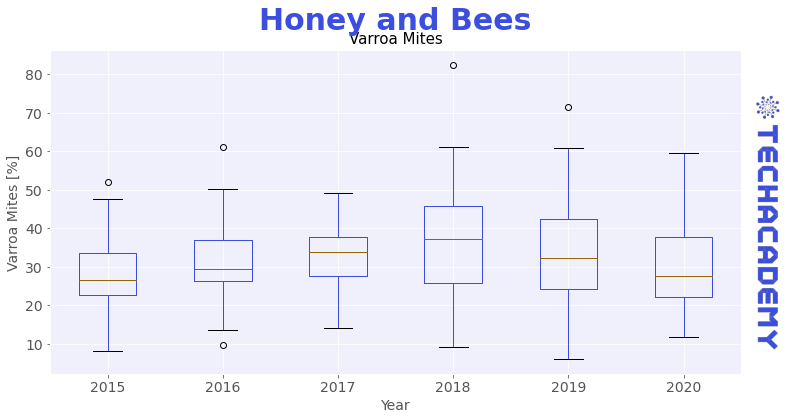

In [31]:
# Varroa Mites
suptitle = "Honey and Bees"
title = "Varroa Mites"
fig, ax = plt.subplots(figsize=(12,6))

df = bees_and_honey.copy()
df.boxplot(column="varroa_mites_perc", by="Year", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Varroa Mites [%]')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

## Task 12: Boxplot by year Honey Production, Varroa Mites, Precipitation, Bee Colonies

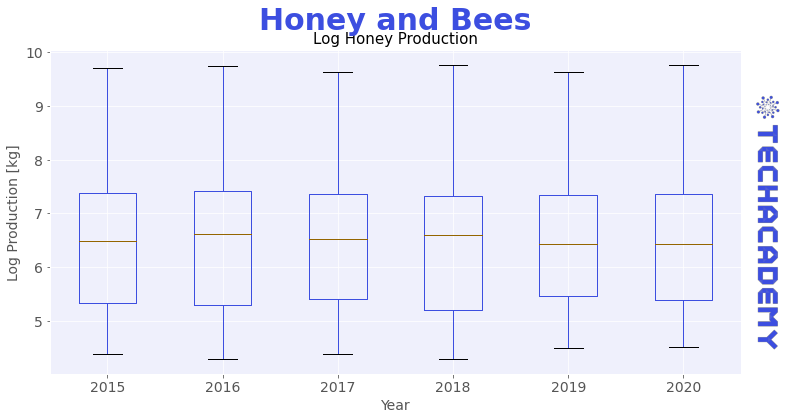

In [32]:
# Honey Production
suptitle = "Honey and Bees"
title = "Log Honey Production"
fig, ax = plt.subplots(figsize=(12,6))

df = bees_and_honey.copy()
df.production_kg = np.log(df.production_kg)  # normalize or choose quantiles
df.boxplot(column="production_kg", by="Year", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Log Production [kg]')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

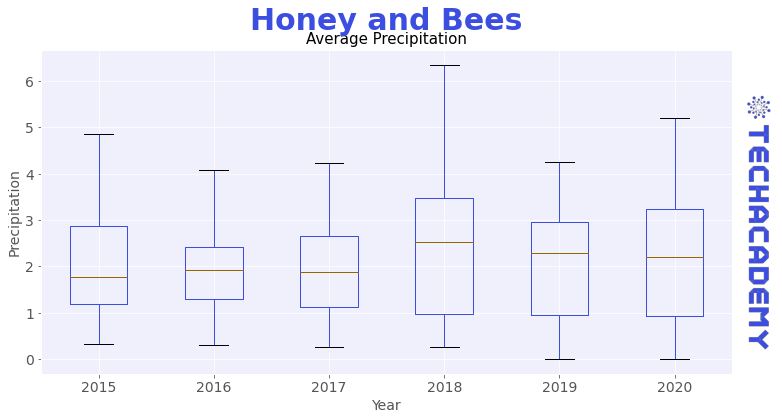

In [33]:
# Precipitation
suptitle = "Honey and Bees"
title = "Average Precipitation"
fig, ax = plt.subplots(figsize=(12,6))

# gotta work on the weather set first, actually (NAs etc.) ...
df = weather.copy()
df = df.groupby([weather.index, weather.datetime.dt.year])["precip"].mean().reset_index(level=1)
df.boxplot(column="precip", by="datetime", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Precipitation')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

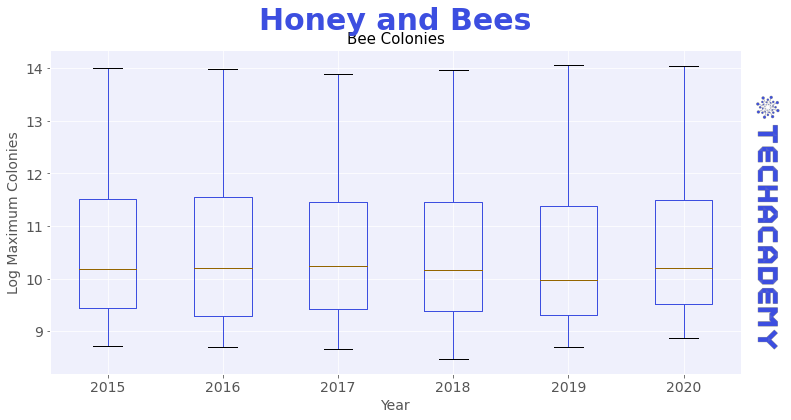

In [34]:
# Bee Colonies
# Honey Production
suptitle = "Honey and Bees"
title = "Bee Colonies"
fig, ax = plt.subplots(figsize=(12,6))

df = bees_and_honey.copy()
df.max_cols = np.log(df.max_cols)  # normalize or choose quantiles
df.boxplot(column="max_cols", by="Year", ax=ax)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Log Maximum Colonies')
ax.set_xticklabels(honey.Year.dt.year.unique())

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

## Task 13: Heatmap

In [35]:
# animated
df = bees.copy()[['Date', 'Starting Colonies']]
df = df.sort_values('Date') # Make sure you sort the time horizon column in ascending order because this column may be in random order
# the animation frame only works with date strings!
df['Date'] = df['Date'].dt.date.astype(str)
#df = df.replace('(NA)', np.nan)
df['Starting Colonies'] = np.log(pd.to_numeric(df['Starting Colonies']))  # important to apply log because of the large discrepancies
df.rename(index=us_state_to_abbrev, inplace=True)
title = 'Bee starting colonies in the U.S. over time'
fig = px.choropleth(df,
                    locations=df.index,
                    locationmode="USA-states",
                    color='Starting Colonies',
                    color_continuous_scale="agsunset",
                    scope="usa",
                    animation_frame='Date',  # make sure 'Date' is string type and sorted in ascending order
                    animation_group='Starting Colonies'
                    )
fig.update_layout(
      title_text = title,
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black",
      title_x=0.45,
     )
fig.write_image(f"../Leitfaden/plot/{title}.jpg")
fig.show()

In [36]:
# not animated
year = 2020
df = bees.copy()[['Date', 'Starting Colonies']]
df = df.loc[df.Date.dt.year == year]
df['Starting Colonies'] = np.log(pd.to_numeric(df['Starting Colonies']))  # important to apply log because of the large discrepancies
df.rename(index=us_state_to_abbrev, inplace=True)
title = f'Log bee starting colonies in the U.S. in {str(year)}'
fig = px.choropleth(df,
                    locations=df.index,
                    locationmode="USA-states",
                    color='Starting Colonies',
                    color_continuous_scale="agsunset",
                    scope="usa",
                    )
fig.update_layout(
      title_text = title,
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black",
      title_x=0.45,
     )
fig.write_image(f"../Leitfaden/plot/{title}.jpg")
fig.show()

In [37]:
df = bees_and_honey.copy()
df = df.loc[df.Date.dt.year == year]
df

Date  starting_cols   max_cols  lost_cols  added_cols  \
State                                                                        
Alabama        2020-01-01        10000.0    12875.0     2327.5      2287.5   
Arizona        2020-01-01        27000.0    28500.0     5450.0      6400.0   
Arkansas       2020-01-01        18625.0    19625.0     1800.0      2145.0   
California     2020-01-01       972500.0  1252500.0   140750.0    149000.0   
Colorado       2020-01-01        17250.0    22000.0     3692.5      3932.5   
Florida        2020-01-01       266250.0   283750.0    32000.0     38000.0   
Georgia        2020-01-01       143750.0   150750.0    19375.0     23125.0   
Hawaii         2020-01-01        18000.0    18000.0     1250.0      2125.0   
Idaho          2020-01-01        92000.0   128500.0    16625.0     13225.0   
Illinois       2020-01-01        12625.0    12625.0     1750.0      2050.0   
Indiana        2020-01-01        11750.0    12250.0     1262.5      1860.0   
Iowa           2020-01-01        25500.0    30500.0     2950.0      6200.0   
Kansas         2020-01-01         6250.0     7125.0     1187.5      1240.0   
Kentucky       2020-01-01        10250.0    11375.0     1225.0      1695.0   
Louisiana      2020-01-01        47750.0    50250.0     2725.0      3132.5   
Maine          2020-01-01         5350.0    10575.0      615.0       465.0   
Michigan       2020-01-01        79250.0    88000.0    13250.0     15100.0   
Minnesota      2020-01-01        73250.0   102000.0     8480.0      3325.0   
Mississippi    2020-01-01        29000.0    32750.0     3725.0      5075.0   
Missouri       2020-01-01         7375.0     7500.0     1842.5      1627.5   
Montana        2020-01-01        71250.0    99500.0     6162.5      7125.0   
Nebraska       2020-01-01        28875.0    37250.0     3467.5      2587.5   
New Jersey     2020-01-01        12250.0    16000.0      937.5      1450.0   
New York       2020-01-01        44000.0    51750.0     3550.0      3532.5   
North Carolina 2020-01-01        20375.0    24500.0     2800.0      2437.5   
North Dakota   2020-01-01       255000.0   359250.0    31375.0     30625.0   
Ohio           2020-01-01        18500.0    20125.0     2800.0      2770.0   
Oregon         2020-01-01       102500.0   112750.0     8700.0     10000.0   
Pennsylvania   2020-01-01        23125.0    26500.0     1782.5      2237.5   
South Carolina 2020-01-01        13750.0    16875.0     1875.0      1717.5   
South Dakota   2020-01-01       114125.0   168000.0    21950.0     10255.0   
Tennessee      2020-01-01        12500.0    14000.0     1695.0      1720.0   
Texas          2020-01-01       226500.0   288250.0    30625.0     33500.0   
Utah           2020-01-01        21500.0    27250.0     2425.0      3700.0   
Vermont        2020-01-01         7250.0     7375.0      300.0       477.5   
Virginia       2020-01-01         7500.0     8000.0     1125.0      1845.0   
Washington     2020-01-01        73750.0    98750.0     7125.0      4145.0   
West Virginia  2020-01-01         7250.0     7750.0      690.0       632.5   
Wisconsin      2020-01-01        42750.0    52750.0     4900.0      4617.5   
Wyoming        2020-01-01        19375.0    26500.0     1835.0      1412.5   

                renovated_cols  perc_renovated  varroa_mites_perc  \
State                                                               
Alabama                 1107.5           19.50             39.150   
Arizona                 1805.0            8.25             25.100   
Arkansas                 500.0            2.75             37.300   
California            118000.0           10.75             33.850   
Colorado                2205.0           12.00             23.550   
Florida                18750.0            7.00             37.250   
Georgia                22000.0           14.75             45.975   
Hawaii                  2067.5           12.25             59.575   
Idaho                  10030.0           12.00        

In [38]:
df = bees_and_honey.copy()
df = df.loc[df.Date.dt.year == year]
# cute formatting
df[["max_cols", "lost_cols"]] = df[["max_cols", "lost_cols"]].astype(int).applymap(lambda x: f'{x:,}')
# Initiate the map
m = folium.Map(
    location=[39, -101],  # Central USA Coordinates
    zoom_start=5,
    tiles='Stamen Terrain '  # Map Style
)

# Use a for-loop to plot circles
for idx, row in df.iterrows():
    lat = row["Latitude"]
    lon =  row["Longitude"]
    honey_prod = row["production_kg"]
    stock_pr = row["stock_price_kg"]
    max_cols = row["max_cols"]
    lost_cols = row["lost_cols"]

    # Your code here
    popup_content = f"<b>Maximum Colonies</b>:<br><span> {max_cols}</span><br> \
    <b>Lost Colonies</b>:<br><span> {lost_cols}</span><br> <b>Honey Production</b>:<br><span> {honey_prod}</span><br> <b>Stock Price</b>:<br><span> {stock_pr}</span>"
    folium.Marker([lat, lon],
          popup=popup_content,
    tooltip='Click me!').add_to(m)
    folium.CircleMarker((lat, lon),
                    radius=4
                   ).add_to(m)

title_h2_html = f'<h2 style="text-align:center; line-height: 0px; margin-bottom:-2px; color:#3C4EE0">{year} Bee Colonies in the U.S.A.</h2>'
title_h3_html = '<h4 style="text-align:center; line-height: 0px; margin-bottom:15px; color:black" >Yearly Average Statistics</h4>'
title_html = title_h2_html + '<br>' + title_h3_html
m.get_root().html.add_child(folium.Element(title_html))

m  # Displays the map

# Advanced Section

## Merging Weather and Bees

In [166]:
bees["quarterly_dt"] = bees.Date.dt.to_period("Q")
weather["quarterly_dt"] = weather.datetime.dt.to_period("Q")
# quite a few weather columns are completely empty
weather_essentials = weather.dropna(axis=1, how='all')
# no data on New Mexico and Florida
weather_essentials.loc[weather_essentials.index == "New Mexico"]

latitude  longitude   datetime  tempmax  tempmin  temp  \
State_code                                                           
New Mexico    34.166   -106.026 2015-01-01      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2015-01-02      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2015-01-03      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2015-01-04      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2015-01-05      0.0      0.0   NaN   
...              ...        ...        ...      ...      ...   ...   
New Mexico    34.166   -106.026 2020-12-27      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2020-12-28      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2020-12-29      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2020-12-30      0.0      0.0   NaN   
New Mexico    34.166   -106.026 2020-12-31      0.0      0.0   NaN   

            feelslikemax  feelslikemin  feelslike  dew  ...  snowdepth  \
State_code                                              ...              
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
...                  ...           ...        ...  ...  ...        ...   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   
New Mexico           0.0           0.0        NaN  NaN  ...        NaN   

            windgust  windspeed  winddir  sealevelpressure  cloudcover  \
State_code                                                               
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
...              ...        ...      ...               ...         ...   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   
New Mexico       NaN        NaN      NaN               NaN         NaN   

            visibility  Group4  Group3  quarterly_dt  
State_code                                            
New Mexico         NaN     NaN     NaN        2015Q1  
New Mexico         NaN     NaN     NaN        2015Q1  
New Mexico         NaN     NaN     NaN        2015Q1  
New Mexico         NaN     NaN     NaN        2015Q1  
New Mexico         NaN     NaN     NaN        2015Q1  
...                ...     ...     ...           ...  
New Mexico         NaN     NaN     NaN        2020Q4  
New Mexico         NaN     NaN     NaN        2020Q4  
New Mexico         NaN     NaN     NaN        2020Q4  
New Mexico         NaN     NaN     NaN        2020Q4  
New Mexico         NaN     NaN     NaN        2020Q4  

[2192 rows x 23 columns]

In [40]:
# aggregate with simple means but NOT for the max / min variables!
columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin']
col_max = ["tempmax", "feelslikemax"]
col_min = ["tempmin", "feelslikemin"]
cols = weather_essentials.columns.drop(columns)
reduced_weather_essentials = pd.concat([weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt])[cols].mean(), weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt])[col_max].max(), weather_essentials.groupby([weather_essentials.index, weather_essentials.quarterly_dt])[col_min].min()], axis=1)
reduced_weather_essentials

latitude  longitude       temp  feelslike        dew  \
State_code quarterly_dt                                                         
Alabama    2015Q1          32.601    -86.681   9.508889   8.467778   3.942222   
           2015Q2          32.601    -86.681  22.627473  23.100000  17.712088   
           2015Q3          32.601    -86.681  25.821739  27.216304  21.133696   
           2015Q4          32.601    -86.681  15.893478  15.802174  11.970652   
           2016Q1          32.601    -86.681  10.989011  10.330769   5.110989   
...                           ...        ...        ...        ...        ...   
Wyoming    2019Q4          43.000   -107.555  -3.003261  -6.253261  -8.920652   
           2020Q1          43.000   -107.555  -4.492308  -8.332967  -9.574725   
           2020Q2          43.000   -107.555  11.105495   9.751648  -1.298901   
           2020Q3          43.000   -107.555  19.530435  19.028261   0.708696   
           2020Q4          43.000   -107.555   0.506522  -2.486957  -9.266304   

                          humidity    precip  precipcover  snowdepth  \
State_code quarterly_dt                                                
Alabama    2015Q1        72.147111  1.566556     8.333444        NaN   
           2015Q2        76.751868  1.879341     7.097253        NaN   
           2015Q3        77.849348  1.866848     6.340870        NaN   
           2015Q4        80.227065  3.915652    11.574457        NaN   
           2016Q1        70.745934  2.822747     7.787802        NaN   
...                            ...       ...          ...        ...   
Wyoming    2019Q4        68.109130  0.372935     3.487283        NaN   
           2020Q1        70.770330  0.360989     3.113407        NaN   
           2020Q2        47.948242  0.624835     2.930330        NaN   
           2020Q3        32.694565  0.133152     0.815217        NaN   
           2020Q4        53.486630  0.171848     1.856957        NaN   

                          windgust  ...     winddir  sealevelpressure  \
State_code quarterly_dt             ...                                 
Alabama    2015Q1        38.605128  ...  191.694444       1021.847778   
           2015Q2        39.669697  ...  164.123077       1017.416484   
           2015Q3        39.620000  ...  170.507609       1015.601087   
           2015Q4        32.429545  ...  149.811957       1019.061957   
           2016Q1        35.778333  ...  198.839560       1019.084615   
...                            ...  ...         ...               ...   
Wyoming    2019Q4        57.015152  ...  157.460870       1020.114130   
           2020Q1        54.642857  ...  174.134066       1018.860440   
           2020Q2        55.163095  ...  191.791209       1012.487912   
           2020Q3        51.517808  ...  184.229348       1013.752174   
           2020Q4        57.865000  ...  179.263043       1019.645652   

                         cloudcover  visibility  Group4  Group3  tempmax  \
State_code quarterly_dt                                                    
Alabama    2015Q1         23.354444   14.812222     1.0     1.0     27.2   
           2015Q2         16.114286   15.285714     1.0     1.0     35.5   
           2015Q3         16.291304   15.429348     1.0     1.0     36.5   
           2015Q4         27.982609   14.834783     1.0     1.0     29.2   
           2016Q1         24.869231   15.171429     1.0     1.0     30.4   
...                             ...         ...     ...     ...      ...   
Wyoming    2019Q4         25.010870   14.902174     4.0     3.0     21.7   
           2020Q1         22.268132   15.146154     4.0     3.0     14.4   
           2020Q2         22.918681   15.483516     4.0     3.0     31.7   
           2020Q3          5.813043   15.646739     4.0     3.0     33.8   
           2020Q4         15.610870   15.408696     4.0     3.0     25.2   

                         feelslikemax  tempmin  feelslikemin  
State_code quarterly_dt         

In [42]:
bees_and_weather = bees.merge(reduced_weather_essentials, left_on=["State", "quarterly_dt"], right_on=["quarterly_dt"], right_index=True)
bees_and_weather

Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-10-01             8000.0            8000.0          610.0   
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
...            ...                ...               ...            ...   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama           160.0               260.0                3.0   
Alabama            80.0                60.0                1.0   
Alabama          2100.0                90.0                1.0   
Alabama          1900.0               680.0                9.0   
Alabama          2800.0               250.0                4.0   
...                 ...                 ...                ...   
Wyoming           100.0               490.0                2.0   
Wyoming           450.0                60.0                2.0   
Wyoming          4400.0              2100.0                7.0   
Wyoming           640.0              7500.0               22.0   
Wyoming           160.0               380.0                2.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    63.1                                 70.6   
Alabama                     3.1                                  6.4   
Alabama                    24.2                                 22.0   
Alabama                    16.7                                 42.5   
Alabama                    10.0                                  5.4   
...                         ...                                  ...   
Wyoming                    27.6                                 12.3   
Wyoming                    27.6                                 12.3   
Wyoming                    28.8                                 12.3   
Wyoming                    13.4                                 12.3   
Wyoming                    19.2                                  0.0   

         Diseases (percent)  ...     winddir  sealevelpressure  cloudcover  \
State                        ...                                             
Alabama                 0.2  ...  170.507609       1015.601087   16.291304   
Alabama                 0.2  ...  149.811957       1019.061957   27.982609   
Alabama                 4.3  ...  198.839560       1019.084615   24.869231   
Alabama                 4.3  ...  164.123077       1017.416484   16.114286   
Alabama                 4.3  ...  191.694444       1021.847778   23.354444   
...                     ...  ...         ...               ...         ...   
Wyoming                 3.2  ...  157.460870       1020.114130   25.010870   
Wyoming                 0.1  ...  174.134066       1018.860440   22.268132   
Wyoming                 0.1  ...  191.791209       1012.487912   22.918681   
Wyoming                 0.7  ...  184.229348       1013.752174    5.813043   
Wyoming                 0.7  ...  179.263043       1019.645652   15.610870   

        visibility  Group4  Group3  tempmax feelslikemax  tempmin  \
State                                                               
Alabama  15.429348     1.0     1.0     36.5         42.7     10.6   
Alabama  14.834783     1.0     1.

## Adding interesting things

In [149]:
dis_quarter_means = bees_and_weather.groupby(["State", bees_and_weather.Date.dt.quarter])[["Varroa Mites (Percent)", "Other pests and parasites (Percent)", "Diseases (percent)", "Pesticides (percent)"]].mean()
dis_quarter_means

State  Date  Varroa Mites (Percent)  \
0      Alabama     1               20.483333   
1      Alabama     2               20.516667   
2      Alabama     3               52.883333   
3      Alabama     4               25.966667   
4      Arizona     1               31.683333   
..         ...   ...                     ...   
175  Wisconsin     4               45.166667   
176    Wyoming     1               12.533333   
177    Wyoming     2               16.566667   
178    Wyoming     3               30.566667   
179    Wyoming     4               34.316667   

     Other pests and parasites (Percent)  Diseases (percent)  \
0                              15.583333            2.083333   
1                              22.816667            1.466667   
2                              42.966667            0.683333   
3                              19.466667            4.416667   
4                              14.166667            5.366667   
..                                   ...                 ...   
175                            19.283333           12.466667   
176                             2.266667            2.266667   
177                             6.066667            2.816667   
178                             5.200000            3.733333   
179                             4.583333            4.100000   

     Pesticides (percent)  
0                4.800000  
1                7.450000  
2               11.433333  
3                3.416667  
4                7.450000  
..                    ...  
175             16.883333  
176              0.416667  
177              1.700000  
178              4.583333  
179              5.133333  

[180 rows x 6 columns]

In [43]:
# Quarter Dummies
bees_and_weather = pd.concat([bees_and_weather, pd.get_dummies(bees_and_weather.Date.dt.quarter, prefix="quarter")], axis=1)
bees_and_weather["tmp_difference"] = bees_and_weather["tempmax"] - bees_and_weather["tempmin"]
bees_and_weather.groupby("State")["temp"].var()
bees_and_weather["log_lost_cols"] = np.log(bees_and_weather["Lost Colonies"])
bees_and_weather["log_max_cols"] = np.log(bees_and_weather["Maximum Colonies"])
quarter_state_means = bees_and_weather.groupby()
#bees_and_weather["abn_mites"] =
bees_and_weather

c:\users\thilo\onedrive\studium\techacademy\sose22\python\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



Date  Starting Colonies  Maximum Colonies  Lost Colonies  \
State                                                                    
Alabama 2015-07-01             8500.0            9000.0         1400.0   
Alabama 2015-10-01             8000.0            8000.0          610.0   
Alabama 2016-01-01             7500.0            7500.0         1700.0   
Alabama 2015-04-01             7500.0            7500.0          860.0   
Alabama 2015-01-01             7000.0            7000.0         1800.0   
...            ...                ...               ...            ...   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
Wyoming 2020-01-01             4000.0           17000.0          140.0   
Wyoming 2020-04-01            17500.0           30000.0         2000.0   
Wyoming 2020-07-01            33000.0           34000.0         3600.0   
Wyoming 2020-10-01            23000.0           25000.0         1600.0   

         Added Colonies  Renovated Colonies  Percent Renovated  \
State                                                            
Alabama           160.0               260.0                3.0   
Alabama            80.0                60.0                1.0   
Alabama          2100.0                90.0                1.0   
Alabama          1900.0               680.0                9.0   
Alabama          2800.0               250.0                4.0   
...                 ...                 ...                ...   
Wyoming           100.0               490.0                2.0   
Wyoming           450.0                60.0                2.0   
Wyoming          4400.0              2100.0                7.0   
Wyoming           640.0              7500.0               22.0   
Wyoming           160.0               380.0                2.0   

         Varroa Mites (Percent)  Other pests and parasites (Percent)  \
State                                                                  
Alabama                    63.1                                 70.6   
Alabama                     3.1                                  6.4   
Alabama                    24.2                                 22.0   
Alabama                    16.7                                 42.5   
Alabama                    10.0                                  5.4   
...                         ...                                  ...   
Wyoming                    27.6                                 12.3   
Wyoming                    27.6                                 12.3   
Wyoming                    28.8                                 12.3   
Wyoming                    13.4                                 12.3   
Wyoming                    19.2                                  0.0   

         Diseases (percent)  ...  feelslikemax  tempmin  feelslikemin  \
State                        ...                                        
Alabama                 0.2  ...          42.7     10.6          10.6   
Alabama                 0.2  ...          30.7     -2.2          -3.0   
Alabama                 4.3  ...          28.9     -4.7          -6.8   
Alabama                 4.3  ...          40.3      5.8           5.8   
Alabama                 4.3  ...          27.0    -10.7         -16.7   
...                     ...  ...           ...      ...           ...   
Wyoming                 3.2  ...          21.7    -23.3         -31.6   
Wyoming                 0.1  ...          14.4    -23.3         -31.6   
Wyoming                 0.1  ...          29.5    -16.1         -23.6   
Wyoming                 0.7  ...          31.3     -3.5          -8.9   
Wyoming                 0.7  ...          25.2    -21.7         -28.9   

        quarter_1  quarter_2  quarter_3  quarter_4 tmp_difference  \
State                                                               
Alabama         0          0          1          0           25.9   
Alabama         0          0          0          1           31.4   
Alabama         1          0 

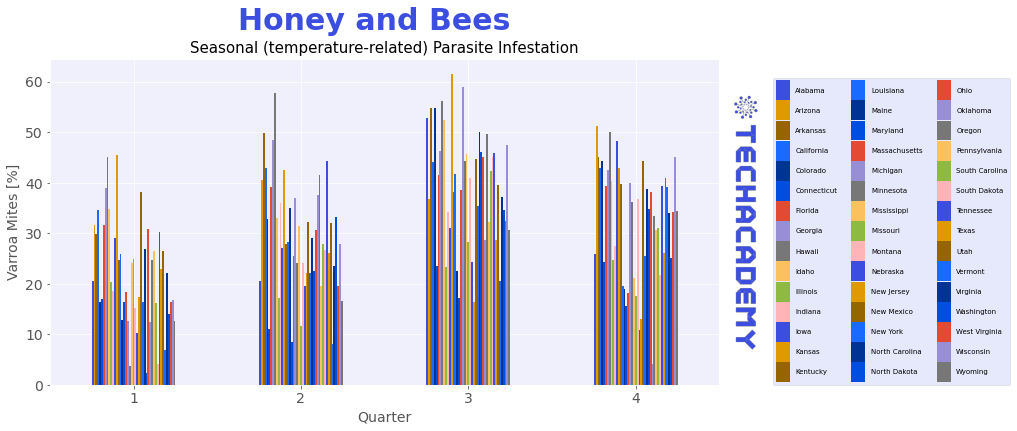

In [213]:
df22 = bees_and_weather.groupby(["State", bees_and_weather.Date.dt.quarter])["Varroa Mites (Percent)"].mean()

title = "Seasonal (temperature-related) Parasite Infestation"
fig, ax = plt.subplots(figsize=(12,6))

df22.unstack(level=0).plot(kind='bar', ax=ax, rot=0)

plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.ylabel('Varroa Mites [%]')
plt.xlabel('Quarter')
plt.legend(fontsize='7', ncol=3, handleheight=4, labelspacing=0.03, loc=(1.08,0))

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

## Correlations

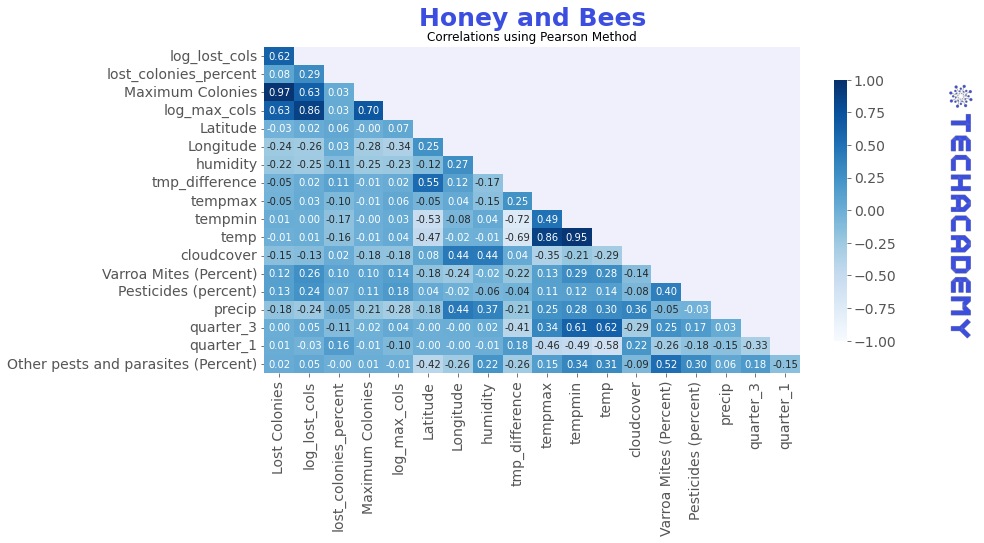

In [198]:
suptitle = "Honey and Bees"
title = "Correlations using Pearson Method"
fig, ax = plt.subplots(figsize=(12,6))

columns = ["Lost Colonies", "log_lost_cols", "lost_colonies_percent", "Maximum Colonies", "log_max_cols", "Latitude", "Longitude", "humidity", "tmp_difference", "tempmax", "tempmin", "temp", "cloudcover", "Varroa Mites (Percent)", "Pesticides (percent)", "precip", "quarter_3", "quarter_1", "Other pests and parasites (Percent)"]
df = bees_and_weather[columns].corr()

mask = np.triu(np.ones_like(df, dtype=bool))
mask = mask[1:, :-1]

corr = df.iloc[1:,:-1].copy()

ax.text(y=1.05, x=0.5, s=suptitle, c='#3C4EE0', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(y=1.01, x=0.5, s=title, fontsize=12, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

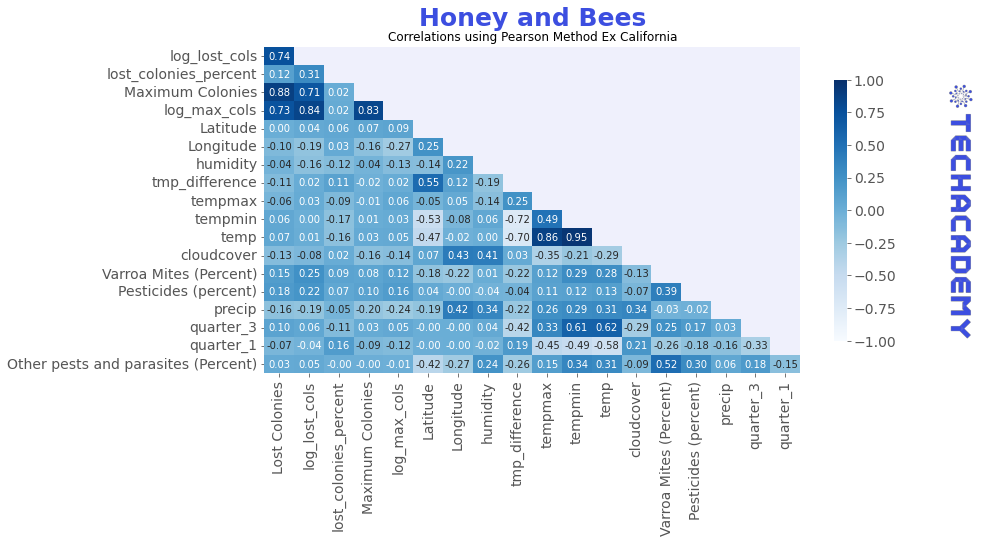

In [193]:
suptitle = "Honey and Bees"
title = "Correlations using Pearson Method Ex California"
fig, ax = plt.subplots(figsize=(12,6))

df = bees_and_weather.loc[bees_and_weather.index != "California"]
df = df[columns].corr()

mask = np.triu(np.ones_like(df, dtype=bool))
mask = mask[1:, :-1]

corr = df.iloc[1:,:-1].copy()

ax.text(y=1.05, x=0.5, s=suptitle, c='#3C4EE0', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(y=1.01, x=0.5, s=title, fontsize=12, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0   )

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

In [199]:
columns += ["quarter_1", "quarter_2", "quarter_3"]
columns = list(set(columns))
df = bees_and_weather.copy()#.loc[bees_and_weather.index != "California"]
statewise_corr = df.groupby(df.index)[columns].corr().unstack(level=1)
statewise_corr

Latitude                                      \
               Latitude Other pests and parasites (Percent)   
State                                                         
Alabama             NaN                                 NaN   
Arizona             NaN                                 NaN   
Arkansas            NaN                                 NaN   
California          NaN                                 NaN   
Colorado            NaN                                 NaN   
Connecticut         NaN                                 NaN   
Florida             NaN                                 NaN   
Georgia             NaN                                 NaN   
Hawaii              NaN                                 NaN   
Idaho               NaN                                 NaN   
Illinois            NaN                                 NaN   
Indiana             NaN                                 NaN   
Iowa                NaN                                 NaN   
Kansas              NaN                                 NaN   
Kentucky            NaN                                 NaN   
Louisiana           NaN                                 NaN   
Maine               NaN                                 NaN   
Maryland            NaN                                 NaN   
Massachusetts       NaN                                 NaN   
Michigan            NaN                                 NaN   
Minnesota           NaN                                 NaN   
Mississippi         NaN                                 NaN   
Missouri            NaN                                 NaN   
Montana             NaN                                 NaN   
Nebraska            NaN                                 NaN   
New Jersey          NaN                                 NaN   
New Mexico          NaN                                 NaN   
New York            NaN                                 NaN   
North Carolina      NaN                                 NaN   
North Dakota        NaN                                 NaN   
Ohio                NaN                                 NaN   
Oklahoma            NaN                                 NaN   
Oregon              NaN                                 NaN   
Pennsylvania        NaN                                 NaN   
South Carolina      NaN                                 NaN   
South Dakota        NaN                                 NaN   
Tennessee           NaN                                 NaN   
Texas               NaN                                 NaN   
Utah                NaN                                 NaN   
Vermont             NaN                                 NaN   
Virginia            NaN                                 NaN   
Washington          NaN                                 NaN   
West Virginia       NaN                                 NaN   
Wisconsin           NaN                                 NaN   
Wyoming             NaN                                 NaN   

                                                                          \
               Pesticides (percent) Varroa Mites (Percent) Lost Colonies   
State                                                                      
Alabama                         NaN                    NaN           NaN   
Arizona                         NaN                    NaN           NaN   
Arkansas                        NaN                    NaN           NaN   
California                      NaN                    NaN           NaN   
Colorado                        NaN                    NaN           NaN   
Connecticut                     NaN                    NaN           NaN   
Florida                         NaN                    NaN           NaN   
Georgia                         NaN                    NaN           NaN   
Hawaii                          NaN                    NaN           NaN   
Idaho                           NaN                    NaN           NaN   
Il

In [200]:
states_by_latitude = bees_and_weather.reset_index()[["Latitude", "State"]].drop_duplicates().sort_values("Latitude")
states_by_latitude

Latitude           State
192   20.460000          Hawaii
144   27.975728         Florida
360   30.973377       Louisiana
888   31.169336           Texas
504   32.585106     Mississippi
0     32.601011         Alabama
168   32.678125         Georgia
816   33.625050  South Carolina
624   34.166232      New Mexico
24    34.168219         Arizona
48    34.751928        Arkansas
672   35.214563  North Carolina
744   35.309765        Oklahoma
864   35.830521       Tennessee
72    37.271875      California
336   37.822294        Kentucky
960   38.003386        Virginia
528   38.304662        Missouri
312   38.498779          Kansas
408   38.806352        Maryland
984   38.899349      Washington
1008  38.920170   West Virginia
96    38.997934        Colorado
912   39.499761            Utah
240   39.739318        Illinois
264   39.766219         Indiana
600   40.143006      New Jersey
720   40.190362            Ohio
648   40.705626        New York
792   40.994593    Pennsylvania
576   41.500819        Nebraska
120   41.518783     Connecticut
288   41.938317            Iowa
432   42.062940   Massachusetts
1056  43.000325         Wyoming
936   43.871755         Vermont
768   44.141905          Oregon
840   44.212699    South Dakota
1032  44.786297       Wisconsin
456   44.943560        Michigan
384   45.218513           Maine
216   45.494576           Idaho
480   46.441859       Minnesota
552   46.679800         Montana
696   47.467882    North Dakota

In [201]:
corr_by_lat = statewise_corr.reindex(states_by_latitude["State"])
#corr_by_lat
corr_by_lat[("Lost Colonies", "tempmin")]

State
Hawaii            0.280862
Florida          -0.444425
Louisiana         0.057003
Texas            -0.575289
Mississippi      -0.060372
Alabama           0.195145
Georgia          -0.191733
South Carolina   -0.293244
New Mexico             NaN
Arizona          -0.096196
Arkansas         -0.141268
North Carolina   -0.347704
Oklahoma         -0.444037
Tennessee        -0.020916
California       -0.696009
Kentucky         -0.358770
Virginia         -0.561261
Missouri         -0.397063
Kansas            0.134820
Maryland         -0.533486
Washington        0.194209
West Virginia    -0.686717
Colorado          0.440156
Utah              0.521738
Illinois         -0.581031
Indiana          -0.162885
New Jersey       -0.074083
Ohio             -0.632934
New York          0.158701
Pennsylvania     -0.732867
Nebraska          0.352505
Connecticut      -0.517656
Iowa             -0.165573
Massachusetts    -0.036517
Wyoming           0.488715
Vermont          -0.493266
Oregon            0.01

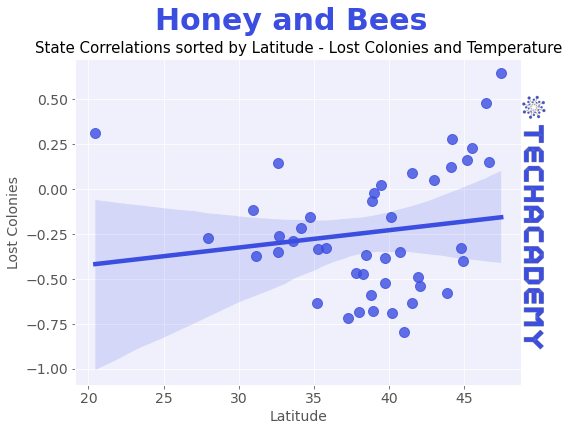

In [202]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Temperature"
fig, ax = plt.subplots(figsize=(8,6))

sns.regplot(x=states_by_latitude["Latitude"], y=corr_by_lat[("lost_colonies_percent", "temp")])  # "Lost Colonies"

plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')

# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)

plt.show()

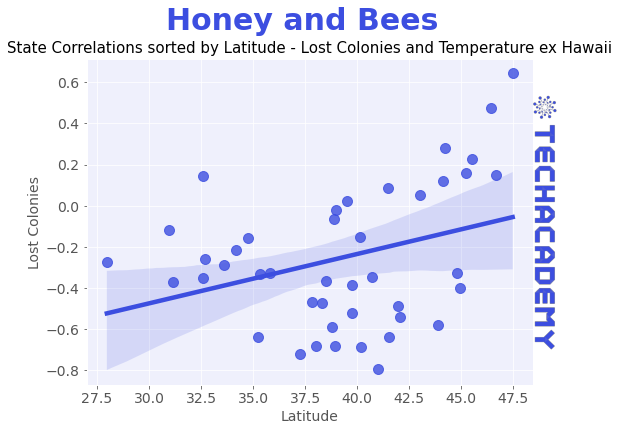

In [203]:
# exclude Hawaii
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Temperature ex Hawaii"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("lost_colonies_percent", "temp")])  # "Lost Colonies"
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

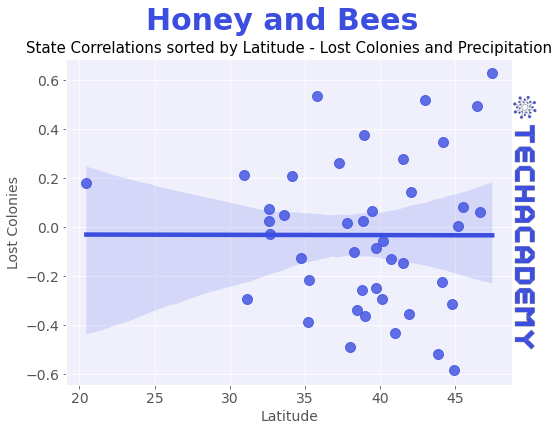

In [204]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Precipitation"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude["Latitude"], y=corr_by_lat[("lost_colonies_percent", "precip")])  # "Lost Colonies"
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

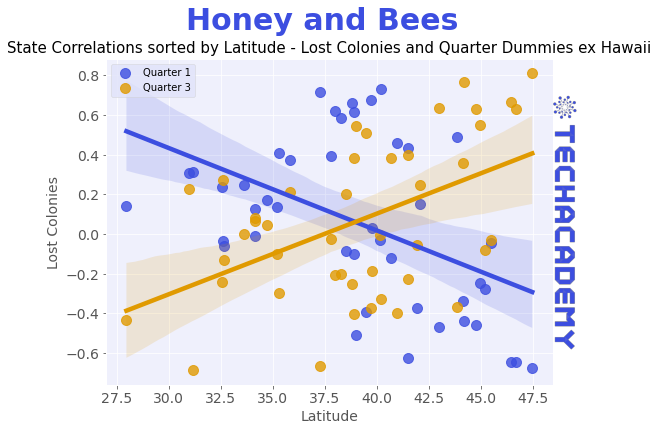

In [209]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Quarter Dummies ex Hawaii"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("lost_colonies_percent", "quarter_1")], label="Quarter 1")  # "Lost Colonies"
#sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_2")])
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("lost_colonies_percent", "quarter_3")], label="Quarter 3")
# sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_4")])
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
plt.legend()
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

In [90]:
corr_by_year = df.groupby(df.Date.dt.year).corr()
corr_by_quarter = df.groupby(df.Date.dt.quarter).corr()
corr_by_year.loc[2015:2020, "Lost Colonies"].xs("quarter_3", level=1, drop_level=False)
corr_by_quarter.loc[1:4, "Lost Colonies"].xs("temp", level=1, drop_level=False)  # even a naive correlation plot across all states but controlling for seasons shows varying effect of the temperature on lost colonies

Date      
1     temp    0.102600
2     temp   -0.024510
3     temp   -0.192924
4     temp   -0.037774
Name: Lost Colonies, dtype: float64

In [ ]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Quarter Dummies ex Hawaii"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_1")], label="Quarter 1")
#sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_2")])
sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_3")], label="Quarter 3")
# sns.regplot(x=states_by_latitude.loc[states_by_latitude.State != "Hawaii"]["Latitude"], y=corr_by_lat.loc[corr_by_lat.index != "Hawaii"][("Lost Colonies", "quarter_4")])
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')
plt.legend()
# TA Logo
im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')
plt.savefig(f"../Leitfaden/plot/{title}.jpg", bbox_inches="tight", dpi=800)
plt.show()

In [171]:
from linearmodels.panel import RandomEffects, PanelOLS
d_m = pd.get_dummies(bees_and_weather.index, prefix='state')
mod_frame = pd.concat([bees_and_weather.reset_index(), d_m], axis=1)
# kick out Hawaii and New Mexico and Florida since they do not have weather data
mod_frame = mod_frame.loc[~mod_frame.State.isin(["Hawaii", "Florida", "New Mexico"])]
mod_frame = mod_frame.set_index(["State", "Date"])
# constant when NOT using quarter dummies
mod_frame["constant"] = 1
mod_frame

Starting Colonies  Maximum Colonies  Lost Colonies  \
State   Date                                                             
Alabama 2015-07-01             8500.0            9000.0         1400.0   
        2015-10-01             8000.0            8000.0          610.0   
        2016-01-01             7500.0            7500.0         1700.0   
        2015-04-01             7500.0            7500.0          860.0   
        2015-01-01             7000.0            7000.0         1800.0   
...                               ...               ...            ...   
Wyoming 2019-10-01            27000.0           28000.0         3300.0   
        2020-01-01             4000.0           17000.0          140.0   
        2020-04-01            17500.0           30000.0         2000.0   
        2020-07-01            33000.0           34000.0         3600.0   
        2020-10-01            23000.0           25000.0         1600.0   

                    Added Colonies  Renovated Colonies  Percent Renovated  \
State   Date                                                                
Alabama 2015-07-01           160.0               260.0                3.0   
        2015-10-01            80.0                60.0                1.0   
        2016-01-01          2100.0                90.0                1.0   
        2015-04-01          1900.0               680.0                9.0   
        2015-01-01          2800.0               250.0                4.0   
...                            ...                 ...                ...   
Wyoming 2019-10-01           100.0               490.0                2.0   
        2020-01-01           450.0                60.0                2.0   
        2020-04-01          4400.0              2100.0                7.0   
        2020-07-01           640.0              7500.0               22.0   
        2020-10-01           160.0               380.0                2.0   

                    Varroa Mites (Percent)  \
State   Date                                 
Alabama 2015-07-01                    63.1   
        2015-10-01                     3.1   
        2016-01-01                    24.2   
        2015-04-01                    16.7   
        2015-01-01                    10.0   
...                                    ...   
Wyoming 2019-10-01                    27.6   
        2020-01-01                    27.6   
        2020-04-01                    28.8   
        2020-07-01                    13.4   
        2020-10-01                    19.2   

                    Other pests and parasites (Percent)  Diseases (percent)  \
State   Date                                                                  
Alabama 2015-07-01                                 70.6                 0.2   
        2015-10-01                                  6.4                 0.2   
        2016-01-01                                 22.0                 4.3   
        2015-04-01                                 42.5                 4.3   
        2015-01-01                                  5.4                 4.3   
...                                                 ...                 ...   
Wyoming 2019-10-01                                 12.3                 3.2   
        2020-01-01                                 12.3                 0.1   
        2020-04-01                                 12.3                 0.1   
        2020-07-01                                 12.3                 0.7   
        2020-10-01                                  0.0                 0.7   

                    Pesticides (percent)  ...  state_Tennessee  state_Texas  \
State   Date                              ...                                 
Alabama 2015-07-01                   2.6  ...                0            0   
        2015-10-01                   0.2  ...                0            0   
        2016-01-01                   8.1  ...                0            0   
        2015-04-01               

In [207]:
import statsmodels.api as sm
# balanced panel data set: yes, no?
cols = ["humidity", "cloudcover", "precip", "Varroa Mites (Percent)", "constant", "quarter_1", "quarter_3",]  # "humidity", "temp", "cloudcover", "precip", "quarter_1", "quarter_2", "quarter_3", "quarter_4"
var = mod_frame.loc[:, cols]
naive_ols = sm.OLS(mod_frame.lost_colonies_percent, var).fit()  # log_lost_cols "Lost Colonies"
mod = RandomEffects(mod_frame.lost_colonies_percent, var)
model_fe = PanelOLS(mod_frame.log_lost_cols, var, entity_effects=True)
fe_res = model_fe.fit()
re_res = mod.fit(cov_type='clustered', cluster_entity=True)  #cov_type="robust")
print(naive_ols.summary())
print(re_res)
print(fe_res)

with open(f"../Leitfaden/plot/naive_ols.tex", 'w') as f:
    f.write(naive_ols.summary().as_latex())
with open(f"../Leitfaden/plot/naive_ols_tables.tex", 'w') as f:
    for table in naive_ols.summary().tables:
        f.write(table.as_latex_tabular())

                              OLS Regression Results                             
Dep. Variable:     lost_colonies_percent   R-squared:                       0.065
Model:                               OLS   Adj. R-squared:                  0.060
Method:                    Least Squares   F-statistic:                     11.63
Date:                   Sun, 24 Apr 2022   Prob (F-statistic):           1.26e-12
Time:                           22:58:04   Log-Likelihood:                -3943.9
No. Observations:                   1008   AIC:                             7902.
Df Residuals:                       1001   BIC:                             7936.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

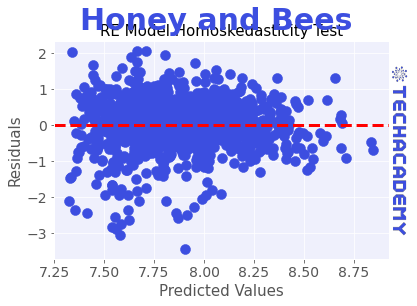

In [158]:
# Store values for checking homoskedasticity graphically
fittedvals_re_res = re_res.predict().fitted_values
residuals_re_res = re_res.resids

# 3A. Homoskedasticity
title = 'RE Model Homoskedasticity Test'
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
ax.scatter(fittedvals_re_res, residuals_re_res)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)

im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.show()

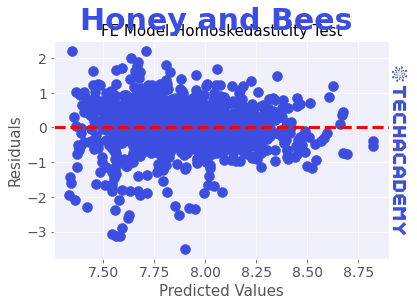

In [159]:
# Store values for checking homoskedasticity graphically
fittedvals_fe_res = fe_res.predict().fitted_values
residuals_fe_res = fe_res.resids

# 3A. Homoskedasticity
title = 'FE Model Homoskedasticity Test'
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
ax.scatter(fittedvals_fe_res, residuals_fe_res)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)

im = plt.imread("../logos/TA_Logo_Vertical1.png")
newax = fig.add_axes([.75, .2, .2, 0.6], anchor='NE', zorder=1)
newax.imshow(im, alpha=1)
newax.axis('off')

plt.show()

In [57]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

mod_frame_with_res = pd.concat([mod_frame.copy(), residuals_re_res], axis=1)
durbin_watson_test_results = durbin_watson(mod_frame_with_res['residual'])
print(durbin_watson_test_results)
mod_frame_with_res["residual"]

nan


State    Date      
Alabama  2015-07-01   -0.401623
         2015-10-01   -3.842611
         2016-01-01   -2.204794
         2015-04-01    0.009649
         2015-01-01    0.418863
                         ...   
Wyoming  2019-10-01    1.690805
         2020-01-01   -6.262157
         2020-04-01    2.094497
         2020-07-01    6.144608
         2020-10-01    1.224529
Name: residual, Length: 1080, dtype: float64